In [67]:
import pandas as pd
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc
from pylab import*

import seaborn as sns
from optbinning import OptimalBinning

In [3]:
ruta="/home/sloker/Documents/python/seminario/Tarea 1/tarea2/"
base="tabla.xlsx"
df = pd.read_excel(ruta+base, sheet_name=0)

In [4]:
df.head()

,_id_,_id2_,comp_mixto1,comp_externo1,comp_externo2,comp_externo3,comp_externo4,fecha_inicio,comp_interno1,comp_interno2,comp_interno3,comp_interno4,categoria1,categoria2,categoria3,inversion,Y
0,78213,1798899,0.33522,260.869565,25.854639,56,-230.0,2020-03-25,0.000000,b'0',11,58,2,9,156,0.000000,1
1,76457,1758511,0.33334,40.579710,2.872738,62,-230.0,2020-02-13,0.000000,b'1',28,45,1,4,173,0.041039,1
2,40666,935318,0.29186,0.000000,0.000000,119,-230.0,2018-01-24,0.000000,b'1',25,45,1,9,170,0.000000,1
3,8329,191567,0.29112,349.275362,34.616490,94,-230.0,2016-10-07,0.000000,b'1',14,59,3,3,159,0.000000,1
4,68389,1572947,0.27318,276.811594,27.434645,125,-230.0,2019-07-30,2026.342452,b'1',1,67,2,9,146,77.422135,1


In [4]:
#df.info()

In [5]:
df['Y'].value_counts(normalize=True)

1    0.84802
0    0.15198
Name: Y, dtype: float64

In [58]:
df['comp_interno1'].value_counts(normalize=True)

0.000000        0.64166
1013.171226     0.03892
1519.756839     0.02962
2026.342452     0.02680
810.536981      0.01828
                 ...   
835.866261      0.00002
1753.368794     0.00002
227.963526      0.00002
16887.537994    0.00002
5761.904762     0.00002
Name: comp_interno1, Length: 680, dtype: float64

In [ ]:
df['categoria2'].value_counts(normalize=True)

In [45]:
df['comp_mixto1'].value_counts()

0.38000    4662
0.37000    3478
0.34000    2027
0.36000    1626
0.30000     571
           ... 
0.28486       1
0.30010       1
0.28624       1
0.24244       1
0.26984       1
Name: comp_mixto1, Length: 7098, dtype: int64

In [9]:
df['comp_interno2'].value_counts(normalize=True)

b'1'    0.70584
b'0'    0.29416
Name: comp_interno2, dtype: float64

In [15]:
train, test = train_test_split(df, test_size = 0.30, random_state = 100) 

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35000 entries, 48824 to 38408
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   _id_           35000 non-null  int64  
 1   _id2_          35000 non-null  int64  
 2   comp_mixto1    35000 non-null  float64
 3   comp_externo1  35000 non-null  float64
 4   comp_externo2  35000 non-null  float64
 5   comp_externo3  35000 non-null  int64  
 6   comp_externo4  35000 non-null  float64
 7   fecha_inicio   35000 non-null  object 
 8   comp_interno1  35000 non-null  float64
 9   comp_interno2  35000 non-null  object 
 10  comp_interno3  35000 non-null  int64  
 11  comp_interno4  35000 non-null  int64  
 12  categoria1     35000 non-null  int64  
 13  categoria2     35000 non-null  int64  
 14  categoria3     35000 non-null  int64  
 15  inversion      35000 non-null  float64
 16  Y              35000 non-null  int64  
dtypes: float64(6), int64(9), object(2)
memory usag

In [9]:
#test.info()

In [16]:
y = train.Y

In [11]:
#optb_inversion = OptimalBinning(name="inversion", dtype="numerical", solver="cp")
#optb_patrimonio.fit(train["inversion"].values, y)
#display("Binning de Patrimonio:",optb_patrimonio.splits)
#patrimonio_table = optb_patrimonio.binning_table 
#display(patrimonio_table.build())


"""
This is a
multilline comment
"""


'\nThis is a\nmultilline comment\n'

In [60]:
#optb de todas las columnas 

optb_comp_mixto1=OptimalBinning(name="comp_mixto1", dtype="numerical", solver="cp",monotonic_trend="descending")
optb_comp_externo1=OptimalBinning(name="comp_externo1", dtype="numerical", solver="cp",monotonic_trend="descending")
optb_comp_externo2=OptimalBinning(name="comp_externo2", dtype="numerical", solver="cp",monotonic_trend="descending")
optb_comp_externo3=OptimalBinning(name="comp_externo3", dtype="numerical", solver="cp",monotonic_trend="descending")
optb_comp_externo4=OptimalBinning(name="comp_externo4",  dtype="categorical", solver="mip")
optb_comp_interno2= OptimalBinning(name="comp_interno2", dtype="numerical", solver="cp",monotonic_trend="descending")
optb_fecha_inicio=OptimalBinning(name="fecha_inicio",  dtype="categorical", solver="mip")
optb_comp_interno1 = OptimalBinning(name="comp_interno2", dtype="numerical", solver="cp",monotonic_trend="descending")
optb_comp_interno2=OptimalBinning(name="comp_interno2",  dtype="categorical", solver="mip")
optb_categoria1=OptimalBinning(name="categoria1",  dtype="categorical", solver="mip")
optb_categoria2=OptimalBinning(name="categoria2",  dtype="categorical", solver="mip")
optb_categoria3=OptimalBinning(name="categoria3",  dtype="categorical", solver="mip")
optb_inversion = OptimalBinning(name="inversion", dtype="numerical", solver="cp",monotonic_trend="descending")



In [61]:
optb_comp_mixto1.fit(train["comp_mixto1"].values,y)
optb_comp_externo1.fit(train["comp_externo1"].values,y)
optb_comp_externo2.fit(train["comp_externo2"].values,y)
optb_comp_externo3.fit(train["comp_externo3"].values,y)
optb_comp_externo4.fit(train["comp_externo4"].values,y)
optb_comp_interno2.fit(train["comp_interno2"].values,y)
optb_fecha_inicio.fit(train["fecha_inicio"].values,y)
optb_comp_interno1.fit(train["comp_interno1"].values,y)
optb_comp_interno2.fit(train["comp_interno2"].values,y)
optb_categoria1.fit(train["categoria1"].values,y)
optb_categoria2.fit(train["categoria2"].values,y)
optb_categoria3.fit(train["categoria3"].values,y)
optb_inversion.fit(train["inversion"].values,y)


OptimalBinning(monotonic_trend='descending', name='inversion')

In [62]:
display(optb_comp_mixto1.splits)
display(optb_comp_externo1.splits)
display(optb_comp_externo2.splits)
display(optb_comp_externo3.splits)
display(optb_comp_externo4.splits)
display(optb_comp_interno2.splits)
display(optb_fecha_inicio.splits)
display(optb_comp_interno1.splits)
display(optb_comp_interno2.splits)
display(optb_categoria1.splits)
display(optb_categoria2.splits)
display(optb_categoria3.splits)
display(optb_inversion.splits)

array([], dtype=float64)

array([  8.6942029 , 166.36376953, 275.79708862, 404.2956543 ,
       555.86956787, 940.99710083])

array([16.48592377, 28.56937695, 33.14665413, 40.405056  , 62.208992  ,
       88.63832474])

array([-26.5, 114.5, 120.5, 124.5, 129.5])

[array([-227., -228., -229.]),
 array([-2.30000000e+02,  9.99999977e+09, -2.26000000e+02])]

[array(["b'1'"], dtype=object), array(["b'0'"], dtype=object)]

[array(['2021-04-30', '2021-02-02', '2021-01-30', '2021-01-29',
        '2021-01-28', '2020-11-14', '2021-01-27', '2021-02-03',
        '2020-11-15', '2021-01-25', '2021-01-23', '2020-11-16',
        '2021-01-22', '2021-01-21', '2021-01-20', '2021-01-26',
        '2021-01-19', '2021-02-04', '2021-02-06', '2021-02-22',
        '2021-02-20', '2021-02-19', '2021-02-18', '2021-02-17',
        '2020-12-04', '2021-02-05', '2021-02-15', '2021-02-13',
        '2021-02-12', '2021-02-11', '2021-02-10', '2021-02-09',
        '2021-02-08', '2021-02-14', '2021-02-23', '2021-01-18',
        '2021-01-15', '2020-12-01', '2020-12-18', '2020-12-17',
        '2020-12-16', '2020-12-02', '2020-12-15', '2020-12-21',
        '2020-12-14', '2020-12-10', '2020-12-03', '2020-12-09',
        '2020-12-08', '2020-12-07', '2020-12-06', '2020-12-11',
        '2021-01-17', '2020-12-22', '2020-12-24', '2021-01-14',
        '2020-11-22', '2021-01-13', '2021-01-12', '2021-01-11',
        '2021-01-08', '2020-12-23', '202

array([1265.4508667 , 2017.73046875, 3672.74572754])

[array(["b'1'"], dtype=object), array(["b'0'"], dtype=object)]

[array([1]), array([2]), array([4, 3, 5, 6])]

[array([12,  4, 13,  9]),
 array([2, 1, 6]),
 array([3, 5]),
 array([ 8, 11, 10,  7])]

[array([172, 175, 157, 158]),
 array([155, 165, 167]),
 array([152, 162, 176, 159]),
 array([164]),
 array([160]),
 array([169, 166]),
 array([156, 171]),
 array([146, 153, 150]),
 array([168, 151, 154]),
 array([161, 148, 173]),
 array([170, 163, 149, 177, 174, 147])]

array([5.68027999e-02, 7.98553734e+01, 2.61636887e+02])

In [63]:
comp_mixto1_table=optb_comp_mixto1.binning_table
comp_externo1_table=optb_comp_externo1.binning_table
comp_externo2_table=optb_comp_externo2.binning_table
comp_externo3_table=optb_comp_externo3.binning_table
comp_externo4_table=optb_comp_externo4.binning_table
comp_interno2_table=optb_comp_interno2.binning_table
fecha_inicio_table=optb_fecha_inicio.binning_table
comp_interno1_table=optb_comp_interno1.binning_table
comp_interno2_table=optb_comp_interno2.binning_table
categoria1_table=optb_categoria1.binning_table
categoria2_table=optb_categoria2.binning_table
categoria3_table=optb_categoria3.binning_table
inversion_table=optb_inversion.binning_table

In [64]:
display(comp_mixto1_table.build())
display(comp_externo1_table.build())
display(comp_externo2_table.build())
display(comp_externo3_table.build())
display(comp_externo4_table.build())
display(comp_interno2_table.build())
display(fecha_inicio_table.build())
display(comp_interno1_table.build())
display(comp_interno2_table.build())
display(categoria1_table.build())
display(categoria2_table.build())
display(categoria3_table.build())
display(inversion_table.build())

,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, inf)",35000,1.0,5352,29648,0.847086,-0.0,0.0,0.0
1,Special,0,0.0,0,0,0.000000,0.0,0.0,0.0
2,Missing,0,0.0,0,0,0.000000,0.0,0.0,0.0
Totals,,35000,1.0,5352,29648,0.847086,,0.0,0.0


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 8.69)",1813,0.051800,239,1574,0.868174,-0.172988,0.001459,0.000182
1,"[8.69, 166.36)",10886,0.311029,1464,9422,0.865515,-0.149951,0.006636,0.000829
2,"[166.36, 275.80)",5930,0.169429,833,5097,0.859528,-0.099449,0.001618,0.000202
3,"[275.80, 404.30)",4598,0.131371,666,3932,0.855154,-0.063689,0.000521,0.000065
4,"[404.30, 555.87)",3583,0.102371,577,3006,0.838962,0.061401,0.000394,0.000049
5,"[555.87, 941.00)",4843,0.138371,856,3987,0.823250,0.1734,0.004415,0.000551
6,"[941.00, inf)",3347,0.095629,717,2630,0.785778,0.412261,0.018659,0.002316
7,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
8,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,35000,1.000000,5352,29648,0.847086,,0.033703,0.004195


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 16.49)",15152,0.432914,2065,13087,0.863714,-0.134565,0.007479,9.341086e-04
1,"[16.49, 28.57)",6147,0.175629,851,5296,0.861558,-0.116371,0.002284,2.852856e-04
2,"[28.57, 33.15)",1888,0.053943,278,1610,0.852754,-0.044444,0.000105,1.311342e-05
3,"[33.15, 40.41)",1988,0.056800,302,1686,0.848089,-0.007763,0.000003,4.266978e-07
4,"[40.41, 62.21)",4247,0.121343,716,3531,0.831410,0.116268,0.001707,2.132952e-04
5,"[62.21, 88.64)",2599,0.074257,473,2126,0.818007,0.209022,0.003484,4.347623e-04
6,"[88.64, inf)",2979,0.085114,667,2312,0.776099,0.468846,0.021869,2.708880e-03
7,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000e+00
8,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000e+00
Totals,,35000,1.000000,5352,29648,0.847086,,0.036931,4.589872e-03


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, -26.50)",1792,0.051200,244,1548,0.863839,-0.135626,0.000898,1.121822e-04
1,"[-26.50, 114.50)",21732,0.620914,3022,18710,0.860942,-0.111215,0.007387,9.229212e-04
2,"[114.50, 120.50)",3114,0.088971,474,2640,0.847784,-0.005403,0.000003,3.239958e-07
3,"[120.50, 124.50)",2396,0.068457,436,1960,0.818030,0.208867,0.003207,4.001891e-04
4,"[124.50, 129.50)",3484,0.099543,672,2812,0.807118,0.280531,0.008616,1.073524e-03
5,"[129.50, inf)",2482,0.070914,504,1978,0.796938,0.344659,0.009462,1.176976e-03
6,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000e+00
7,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000e+00
Totals,,35000,1.000000,5352,29648,0.847086,,0.029574,3.686117e-03


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"[-227.0, -228.0, -229.0]",2826,0.080743,461,2365,0.836872,0.076789,0.000489,0.000061
1,"[-230.0, 9999999769.99, -226.0]",32174,0.919257,4891,27283,0.847983,-0.006943,0.000044,0.000006
2,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
3,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,35000,1.000000,5352,29648,0.847086,,0.000533,0.000067


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,[b'1'],24774,0.707829,3832,20942,0.845322,0.013554,0.000131,0.000016
1,[b'0'],10226,0.292171,1520,8706,0.851359,-0.033378,0.000322,0.000040
2,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
3,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,35000,1.000000,5352,29648,0.847086,,0.000452,0.000057


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"[2021-04-30, 2021-02-02, 2021-01-30, 2021-01-2...",3355,0.095857,3195,160,0.047690,4.706093,2.784014,0.193356
1,"[2017-02-04, 2016-04-09, 2020-11-05, 2020-11-0...",1750,0.050000,425,1325,0.757143,0.574846,0.019958,0.002461
2,"[2016-08-05, 2016-03-30, 2016-09-19, 2018-01-1...",2219,0.063400,316,1903,0.857594,-0.08352,0.000430,0.000054
3,"[2018-01-05, 2019-07-10, 2018-03-06, 2018-06-0...",1769,0.050543,208,1561,0.882419,-0.303619,0.004186,0.000521
4,"[2017-01-05, 2019-11-22, 2017-02-15, 2018-02-1...",1849,0.052829,190,1659,0.897242,-0.455022,0.009308,0.001154
5,"[2016-06-01, 2020-05-06, 2020-05-28, 2017-08-2...",2583,0.073800,230,2353,0.910956,-0.613443,0.022323,0.002747
6,"[2016-06-28, 2020-08-20, 2016-12-15, 2019-10-0...",2865,0.081857,214,2651,0.925305,-0.804792,0.039781,0.004843
7,"[2019-02-21, 2019-01-22, 2017-12-15, 2020-07-2...",1839,0.052543,120,1719,0.934747,-0.950082,0.033784,0.004071
8,"[2017-11-30, 2020-09-21, 2016-03-08, 2020-05-0...",1758,0.050229,103,1655,0.941411,-1.064903,0.038950,0.004651
9,"[2016-12-06, 2017-03-01, 2016-12-16, 2017-08-1...",1786,0.051029,90,1696,0.949608,-1.224294,0.049447,0.005822


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 1265.45)",28134,0.803829,4155,23979,0.852314,-0.040942,0.001328,0.000166
1,"[1265.45, 2017.73)",1932,0.055200,327,1605,0.830745,0.121005,0.000843,0.000105
2,"[2017.73, 3672.75)",2829,0.080829,490,2339,0.826794,0.148851,0.001885,0.000235
3,"[3672.75, inf)",2105,0.060143,380,1725,0.819477,0.199113,0.002552,0.000319
4,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
5,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,35000,1.000000,5352,29648,0.847086,,0.006608,0.000825


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,[b'1'],24774,0.707829,3832,20942,0.845322,0.013554,0.000131,0.000016
1,[b'0'],10226,0.292171,1520,8706,0.851359,-0.033378,0.000322,0.000040
2,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
3,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,35000,1.000000,5352,29648,0.847086,,0.000452,0.000057


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,[1],15924,0.454971,2586,13338,0.837604,0.07142,0.002379,0.000297
1,[2],10537,0.301057,1642,8895,0.844168,0.02235,0.000152,0.000019
2,"[4, 3, 5, 6]",8539,0.243971,1124,7415,0.868369,-0.174687,0.007003,0.000874
3,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
4,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,35000,1.000000,5352,29648,0.847086,,0.009533,0.001190


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"[12, 4, 13, 9]",23854,0.681543,3949,19905,0.834451,0.094416,0.006277,0.000784
1,"[2, 1, 6]",4652,0.132914,621,4031,0.866509,-0.158514,0.003159,0.000394
2,"[3, 5]",2934,0.083829,381,2553,0.870143,-0.190301,0.002840,0.000354
3,"[8, 11, 10, 7]",3560,0.101714,401,3159,0.887360,-0.352125,0.011136,0.001385
4,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
5,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,35000,1.000000,5352,29648,0.847086,,0.023411,0.002918


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"[172, 175, 157, 158]",1906,0.054457,376,1530,0.802728,0.30849,0.005753,0.000716
1,"[155, 165, 167]",1779,0.050829,322,1457,0.818999,0.202341,0.002230,0.000278
2,"[152, 162, 176, 159]",5516,0.157600,887,4629,0.839195,0.059673,0.000573,0.000072
3,[164],4954,0.141543,782,4172,0.842148,0.037628,0.000203,0.000025
4,[160],2583,0.073800,406,2177,0.842818,0.032574,0.000079,0.000010
5,"[169, 166]",2359,0.067400,366,1993,0.844850,0.017161,0.000020,0.000002
6,"[156, 171]",2197,0.062771,332,1865,0.848885,-0.013957,0.000012,0.000002
7,"[146, 153, 150]",5448,0.155657,817,4631,0.850037,-0.022965,0.000081,0.000010
8,"[168, 151, 154]",3187,0.091057,443,2744,0.860998,-0.111678,0.001092,0.000136
9,"[161, 148, 173]",2069,0.059114,280,1789,0.864669,-0.142698,0.001145,0.000143


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 0.06)",22983,0.656657,3457,19526,0.849584,-0.019421,0.000246,0.000031
1,"[0.06, 79.86)",7933,0.226657,1204,6729,0.848229,-0.008853,0.000018,0.000002
2,"[79.86, 261.64)",2139,0.061114,339,1800,0.841515,0.042383,0.000111,0.000014
3,"[261.64, inf)",1945,0.055571,352,1593,0.819023,0.202181,0.002434,0.000304
4,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
5,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,35000,1.000000,5352,29648,0.847086,,0.002809,0.000351


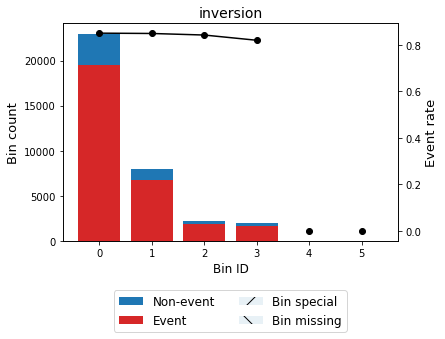

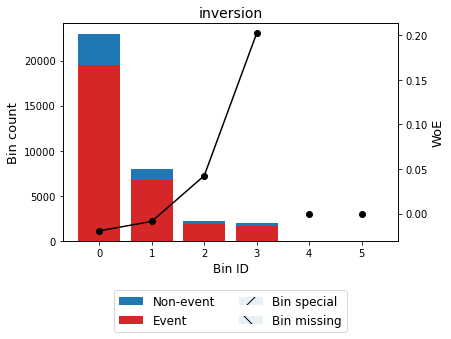

In [36]:
inversion_table.plot(metric="event_rate")
inversion_table.plot(metric="woe")

In [78]:

train["woe_comp_mixto1_table"]=optb_comp_mixto1.transform(train["comp_mixto1"],metric='woe')   
train["woe_comp_externo1_table"]=optb_comp_externo1.transform(train["comp_externo1"],metric='woe')   
train["woe_comp_externo2_table"]=optb_comp_externo2.transform(train["comp_externo2"],metric='woe')   
train["woe_comp_externo3_table"]=optb_comp_externo3.transform(train["comp_externo3"],metric='woe')   
train["woe_comp_externo4_table"]=optb_comp_externo4.transform(train["comp_externo4"],metric='woe')   
train["woe_comp_interno2_table"]=optb_comp_interno2.transform(train["comp_interno2"],metric='woe')   
train["woe_fecha_inicio_table"]=optb_fecha_inicio.transform(train["fecha_inicio"],metric='woe')   
train["woe_comp_interno1_table"]=optb_comp_interno1.transform(train["comp_interno1"],metric='woe')   
train["woe_comp_interno2_table"]=optb_comp_interno2.transform(train["comp_interno2"],metric='woe')   
train["woe_categoria1_table"]=optb_categoria1.transform(train["categoria1"],metric='woe')   
train["woe_categoria2_table"]=optb_categoria2.transform(train["categoria2"],metric='woe')   
train["woe_categoria3_table"]=optb_categoria3.transform(train["categoria3"],metric='woe')   
train["woe_inversion_table"]=optb_inversion.transform(train["inversion"],metric='woe') 


/tmp/ipykernel_6445/97964143.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train["woe_comp_mixto1_table"]=optb_comp_mixto1.transform(train["comp_mixto1"],metric='woe')
/tmp/ipykernel_6445/97964143.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train["woe_comp_externo1_table"]=optb_comp_externo1.transform(train["comp_externo1"],metric='woe')
/tmp/ipykernel_6445/97964143.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_

In [79]:
train.head()

,_id_,_id2_,comp_mixto1,comp_externo1,comp_externo2,comp_externo3,comp_externo4,fecha_inicio,comp_interno1,comp_interno2,...,woe_comp_externo2_table,woe_comp_externo3_table,woe_comp_externo4_table,woe_comp_interno2_table,woe_fecha_inicio_table,woe_comp_interno1_table,woe_categoria1_table,woe_categoria2_table,woe_categoria3_table,woe_inversion_table
48824,40622,934306,0.32718,543.478261,53.863832,131,-230.0,2018-01-08,0.000000,b'1',...,0.116268,0.344659,-0.006943,0.013554,-1.064903,-0.040942,0.071420,-0.352125,0.017161,-0.019421
2704,77473,1781879,0.33714,205.797101,20.396438,120,-230.0,2020-03-18,0.000000,b'1',...,-0.116371,-0.005403,-0.006943,0.013554,-3.097952,-0.040942,0.071420,0.094416,0.037628,-0.019421
25631,62899,1446677,0.36316,101.449275,6.750934,126,-230.0,2019-03-28,1722.391084,b'1',...,-0.134565,0.280531,-0.006943,0.013554,-3.097952,0.121005,0.071420,0.094416,-0.013957,0.042383
7285,16199,372577,0.38000,217.391304,21.545533,76,-230.0,2017-01-26,810.536981,b'1',...,-0.116371,-0.111215,-0.006943,0.013554,-3.097952,-0.040942,-0.174687,-0.158514,0.037628,-0.019421
27346,4358,100234,0.36842,521.739130,51.709279,93,-230.0,2016-02-23,911.854103,b'1',...,0.116268,-0.111215,-0.006943,0.013554,-0.083520,-0.040942,0.022350,-0.158514,-0.013957,-0.019421


In [81]:
corr = train.iloc[:,13:]
corr

,categoria2,categoria3,inversion,Y,woe_comp_mixto1,woe_comp_mixto1_table,woe_comp_externo1_table,woe_comp_externo2_table,woe_comp_externo3_table,woe_comp_externo4_table,woe_comp_interno2_table,woe_fecha_inicio_table,woe_comp_interno1_table,woe_categoria1_table,woe_categoria2_table,woe_categoria3_table,woe_inversion_table
48824,7,166,0.000000,1,-8.881784e-16,-8.881784e-16,0.061401,0.116268,0.344659,-0.006943,0.013554,-1.064903,-0.040942,0.071420,-0.352125,0.017161,-0.019421
2704,9,164,0.000000,1,-8.881784e-16,-8.881784e-16,-0.099449,-0.116371,-0.005403,-0.006943,0.013554,-3.097952,-0.040942,0.071420,0.094416,0.037628,-0.019421
25631,9,156,130.382135,1,-8.881784e-16,-8.881784e-16,-0.149951,-0.134565,0.280531,-0.006943,0.013554,-3.097952,0.121005,0.071420,0.094416,-0.013957,0.042383
7285,6,164,0.000000,1,-8.881784e-16,-8.881784e-16,-0.099449,-0.116371,-0.111215,-0.006943,0.013554,-3.097952,-0.040942,-0.174687,-0.158514,0.037628,-0.019421
27346,6,156,0.000000,1,-8.881784e-16,-8.881784e-16,0.061401,0.116268,-0.111215,-0.006943,0.013554,-0.083520,-0.040942,0.022350,-0.158514,-0.013957,-0.019421
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16304,9,171,0.000000,0,-8.881784e-16,-8.881784e-16,-0.063689,-0.044444,-0.111215,-0.006943,0.013554,4.706093,-0.040942,0.071420,0.094416,-0.013957,-0.019421
79,9,164,1.668658,1,-8.881784e-16,-8.881784e-16,-0.149951,-0.134565,0.344659,-0.006943,0.013554,-0.303619,-0.040942,0.071420,0.094416,0.037628,-0.008853
12119,9,166,0.000000,1,-8.881784e-16,-8.881784e-16,0.412261,0.468846,-0.005403,-0.006943,-0.033378,-0.613443,-0.040942,0.071420,0.094416,0.017161,-0.019421
14147,9,164,11.818390,1,-8.881784e-16,-8.881784e-16,-0.063689,-0.007763,0.280531,-0.006943,0.013554,-3.097952,-0.040942,-0.174687,0.094416,0.037628,-0.008853
